# MSEN 330 Homework 6 Solutions
###### Daniel Willhelm 
###### Fall 2021 

###### Helper functions

In [ ]:
def myax(ax): 
  ax.grid(True,alpha=0.2)
  ax.axhline(0,lw=1,color='grey')
  ax.axvline(0,lw=1,color='grey')

def quickplot(): 
  fig, ax = plt.subplots(1,1)
  return fig,ax

## (1) 14.31 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 

# prepare the data
T = [0,5,10,20,30,40]
u = [1.787,1.519,1.307,1.002,0.7975,0.6529]
data = pd.DataFrame(np.column_stack((T,u)),columns=['temp','mu'])
data['temp'] = data.temp + 273.15 # get absolut temps

# get log transform of data
data['temp_inv'] = 1/data.temp
data['ln_mu'] = np.log(data.mu)
print(data.T)

# fit transformed data
# (I typically use sklearns linear function b/c its ease of use)
from scipy.stats import linregress
res = linregress(data.temp_inv,data.ln_mu)

def regfit(x, res): 
  return res.slope*x + res.intercept

res 


                   0           1  ...           4           5
temp      273.150000  278.150000  ...  303.150000  313.150000
mu          1.787000    1.519000  ...    0.797500    0.652900
temp_inv    0.003661    0.003595  ...    0.003299    0.003193
ln_mu       0.580538    0.418052  ...   -0.226273   -0.426331

[4 rows x 6 columns]


LinregressResult(slope=2150.7539911118392, intercept=-7.314308970953609, rvalue=0.9990152358865924, pvalue=1.4541630459832082e-06, stderr=47.75983185406015)

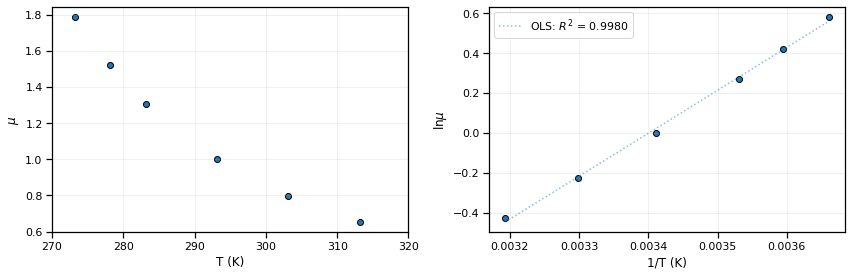

mu = De^(B/T)
B = 2150.7539911118392
ln(D) = -7.314308970953609 --> D = 0.000665941338952778
From the fit we get the function: 

mu(T) = 0.000665941338952778*exp(2150.7539911118392/T)


In [ ]:
# plot raw data
sb.set_context('notebook')
fig,axes = plt.subplots(1,2,figsize=(12,4))
ax = axes[0]
ax.scatter(data.temp,data.mu,ec='k')
ax.set_xlabel('T (K)')
ax.set_ylabel(r'$\mu$')
ax.set_xbound(270,320)
ax.grid(True,alpha=0.2)
# plot log transform of data

ax = axes[1]
ax.scatter(data.temp_inv,data.ln_mu,ec='k')
ax.grid(True,alpha=0.2)
ax.set_xlabel('1/T (K)')
ax.set_ylabel(r'ln$\mu$')

# plot the fit
xfit = np.linspace(data.temp_inv.min(),data.temp_inv.max() )
yfit = regfit(xfit,res)
ax.plot(xfit,yfit,ls=':',alpha=0.5,label=fr'OLS: $R^2$ = {res.rvalue**2:.4f}')
ax.legend()
fig.tight_layout()
plt.show()

print('mu = De^(B/T)')
print(f'B = {res.slope}')
print(f'ln(D) = {res.intercept} --> D = {np.exp(res.intercept)}')

print('From the fit we get the function: \n')
print(f'mu(T) = {np.exp(res.intercept)}*exp({res.slope}/T)')

## (2) 15.3

     0    1    2    3    4    5     6     7
x  3.0  4.0  5.0  7.0  8.0  9.0  11.0  12.0
y  1.6  3.6  4.4  3.4  2.2  2.8   3.8   4.6



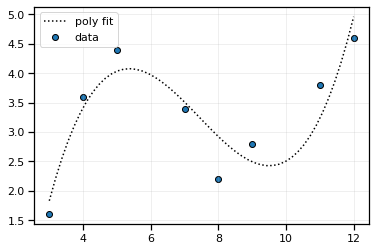


p3 = 0.04667601649405414
p2 = -1.04120692071641
p1 = 7.143817219173224
p0 = -11.488707178897078
f(x) = 0.04667601649405414x^3 + -1.04120692071641x^2 + 7.143817219173224x + -11.488707178897078

R2 = 0.8289812522032721
Sy/x error = 0.5700312454714931


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 

x = [3,4,5,7,8,9,11,12]
y = [1.6,3.6,4.4,3.4,2.2,2.8,3.8,4.6]
data = pd.DataFrame(np.column_stack((x,y)),columns=['x','y'])
print(data.T)
print('')

# fit the data: 
res = np.polyfit(data.x,data.y,deg=3,full=True)
pcoef, rss, _, _,foo = res

# plot data
fig,ax = plt.subplots(1,1)
ax.scatter(data.x,data.y,ec='k',label='data')
pfit = np.poly1d(pcoef)
xfit = np.linspace(data.x.min(),data.x.max())
yfit = pfit(xfit)
ax.plot(xfit,yfit,ls=':',c='k',label='poly fit')
ax.grid(True,alpha=0.2)
ax.legend()
plt.show()

print('')
[print(f'p{3-i} = {coef}') for i,coef in enumerate(pcoef)]
print(f'f(x) = {pcoef[0]}x^3 + {pcoef[1]}x^2 + {pcoef[2]}x + {pcoef[3]}')

from sklearn.metrics import r2_score
from scipy.stats import sem

# Get errors: 

def syx_error(n,m,rss): 
  return np.sqrt(rss/(n-(m+1)))

syx = syx_error(data.shape[0],3,rss)[0]

yhat = pfit(data.x)
r2 = r2_score(data.y, yhat)
print('')
print(f'R2 = {r2}')
print(f'Sy/x error = {syx}')

## (3) 16.2

[12.03412472 -8.17240205 -2.1155976 ]
-0.258870965079213 8.441795331455292

mean = 12.034124717531185
amp = 8.441795331455292
max T day = 200.0


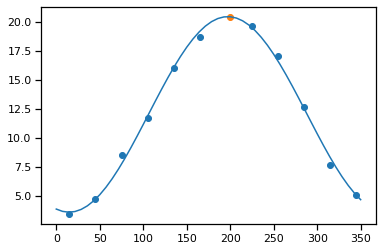

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

t = np.array([15, 45, 75, 105, 135, 165, 225, 255, 285, 315, 345],dtype=float)
T = np.array([3.4, 4.7, 8.5, 11.7, 16.0, 18.7, 19.7, 17.1, 12.7, 7.7, 5.1],dtype=float)

fig,ax = plt.subplots(1,1)
ax.scatter(t,T)

def f(p,t): 
  T = 365
  w0 = (2*np.pi)/T
  return p[0] + p[1]*np.cos(w0*t) + p[2]*np.sin(w0*t)


def lossfunc(p,t,y): 
  return f(p,t) - y

from scipy.optimize import leastsq

p0 = np.array([1]*3,dtype=float)
p1,_ = optimize.leastsq(lossfunc,p0[:],args=(t,T))
A0, A1, B1 = p1 
print(p1)
tfit = np.linspace(0,350)
Tfit = f(p1,tfit)
ax.plot(tfit,Tfit)
theta = -B1/A1
C1 = np.sqrt(A1**2 + B1**2)
print(theta,C1 )
tmax = tfit[Tfit.argmax() ]
ax.scatter(tmax,f(p1,tmax))
print(f'\nmean = {A0}')
print(f'amp = {C1}')
print(f'max T day = {tmax}')

## (4) 17.4

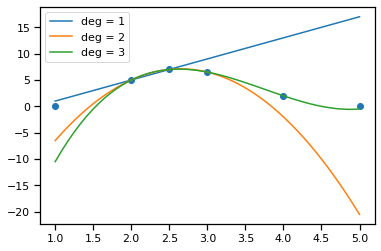

In [ ]:
x = np.array([1,2,2.5,3,4,5])
y = np.array([0,5,7,6.5,2,0])

fig,ax = plt.subplots(1,1)
ax.scatter(x,y)

def _poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p
  
xx = np.linspace(1,5)
ax.plot(xx,newton_polynomial(x[1:3],y[1:3],xx),label='deg = 1') 
ax.plot(xx,newton_polynomial(x[1:4],y[1:4],xx),label='deg = 2') 
ax.plot(xx,newton_polynomial(x[1:5],y[1:5],xx),label='deg = 3') 
ax.legend()

## (5) 18.2

[0.  0.  0.  0.  1.  1.5 2.  3.  3.  3.  3. ]
[70.         70.64285714 76.21428571 14.42857143 13.21428571  7.64285714
 10.          0.          0.          0.          0.        ]
1.2162162162162162


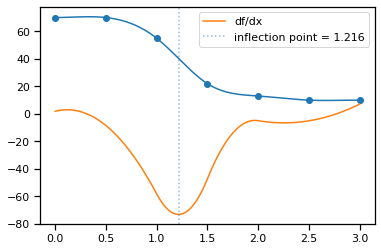

-73.03542731921111
Flux (J) = 0.7303542731921111


In [ ]:
from scipy.interpolate import CubicSpline
x = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0])
y = np.array([70,70,55,22,13,10,10],dtype=float)

spline = CubicSpline(x,y,bc_type='clamped')

# plot
fig,ax = plt.subplots(1,1)
ax.scatter(x,y)
xfit = np.linspace(0,3,1000)
yfit = spline(xfit)
ax.plot(xfit,yfit)

# get more spline info: 
from scipy import interpolate
res = interpolate.splrep(x,y,k=3,full_output=False)
print(res[0]) 
print(res[1]) 
yy = interpolate.splev(xfit,res,der=1)
ax.plot(xfit,yy,label='df/dx')
x_inflect = xfit[yy.argmin()]
print(x_inflect)
ax.axvline(x_inflect,ls=':',alpha=0.5,label=f'inflection point = {x_inflect:.3f}') 
ax.legend() 
plt.show()

# solve J = -k * dT/dz
k = 0.01
dtdz = interpolate.splev(x_inflect,res,der=1)
print(dtdz)
J = -k*dtdz; print(f'Flux (J) = {J}')

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('msen330_homework_6_solutions.ipynb')

--2021-04-19 19:14:24--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-04-19 19:14:24 (25.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/msen330_homework_6_solutions.ipynb to pdf
[NbConvertApp] Support files will be in msen330_homework_6_solutions_files/
[NbConvertApp] Making directory ./msen330_homework_6_solutions_files
[NbConvertApp] Making directory ./msen330_homework_6_solutions_files
[NbConvertApp] Making 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'